In [32]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

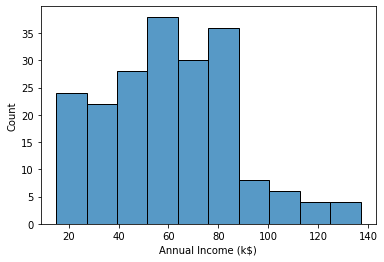

In [4]:
#for Annual income
sns.histplot(df['Annual Income (k$)']);

In [5]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

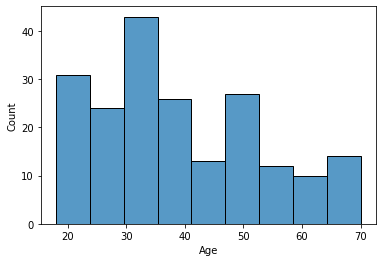

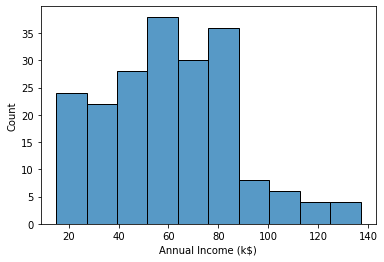

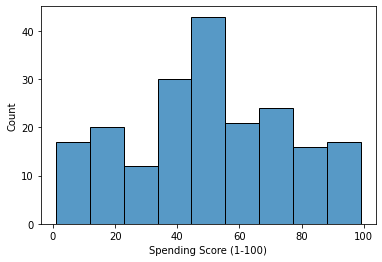

In [8]:
#loop for all variables

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


for i in columns:
    plt.figure()   #new fig for every variable
    sns.histplot(df[i]);
    

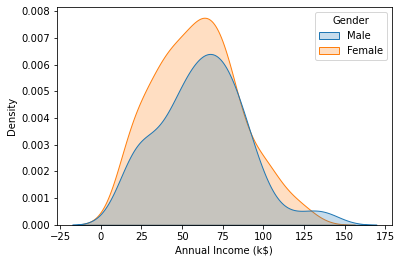

In [10]:
sns.kdeplot(df['Annual Income (k$)'],shade=True, hue=df['Gender']);

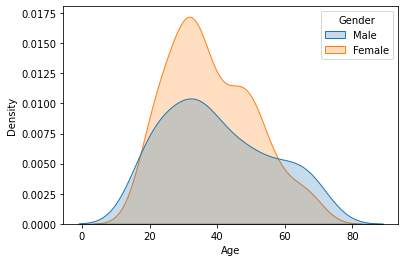

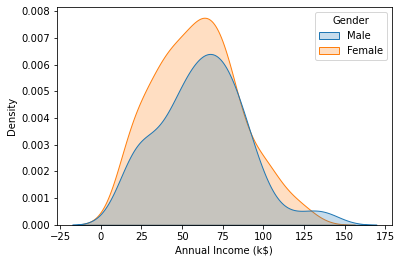

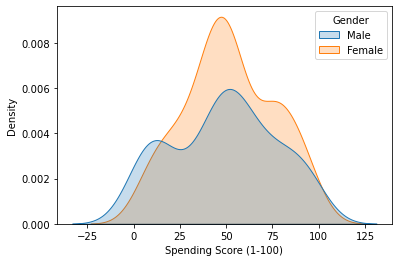

In [14]:
#loop for all variables KDE

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


for i in columns:
    plt.figure()   #new fig for every variable
    sns.kdeplot(df[i],shade=True, hue=df['Gender']);
    

### Check outliers with boxplot

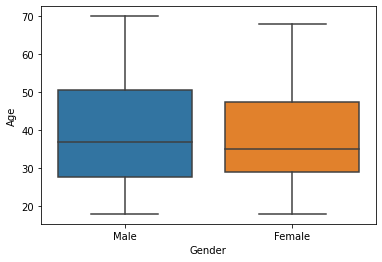

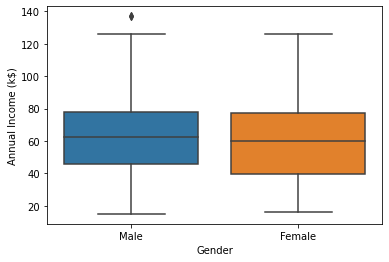

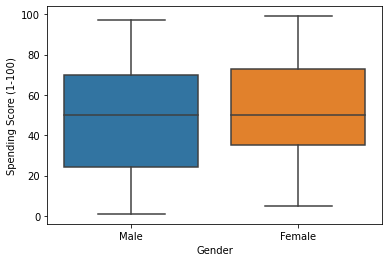

In [15]:
#loop for all variables BOX

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


for i in columns:
    plt.figure()   #new fig for every variable
    sns.boxplot(data=df, x='Gender',y=df[i]);
    

In [21]:
df['Gender'].value_counts(normalize=True)  #%

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

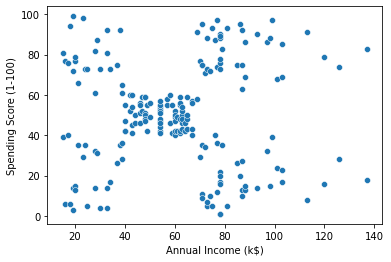

In [22]:
#scatter plot

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

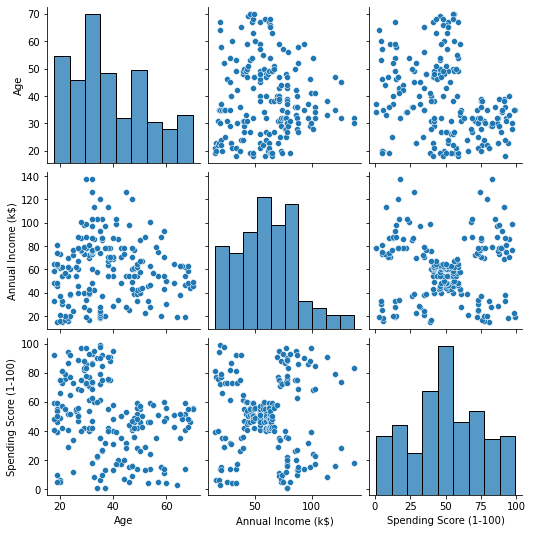

In [27]:
#Pairplot to see the entire data frame and remove ID col 

df.drop("CustomerID", inplace=True, axis=1)
sns.pairplot(df)

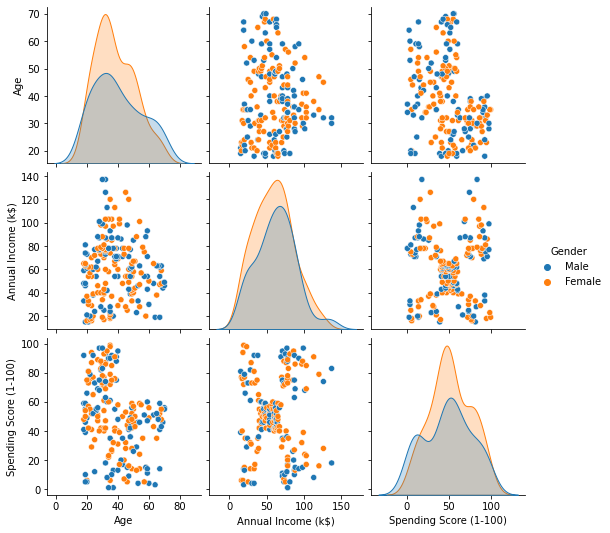

In [29]:
#for gender
sns.pairplot(df,hue="Gender")

In [33]:
#check mean values based on gender

df.groupby(["Gender"]) ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [36]:
#look at correlation

df.corr()



,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

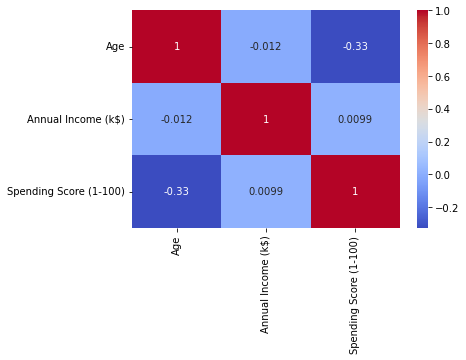

In [38]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Clustering - Univariate , Bivariate

In [47]:
clustering1 = KMeans(n_clusters=3)

In [48]:
clustering1.fit(df[["Annual Income (k$)"]]) #initialize

KMeans(n_clusters=3)

In [49]:
clustering1.labels_


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [50]:
#readd the lable to the initial table

df["Income Cluster"] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [51]:
#finding the K using elbow method - sum of squared errors - INERTIA

SSE=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    SSE.append(kmeans.inertia_)

In [52]:
SSE

[137277.27999999997,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5081.48466026727,
 3950.212698412699,
 2902.583760683761,
 2192.2498778998784,
 1850.7349206349209]

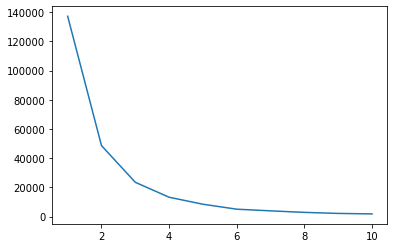

In [53]:
plt.plot(range(1,11),SSE)

In [54]:
#checking univariate results

df.groupby(["Income Cluster"]) ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,37.833333,99.888889,50.638889
2,39.500000,33.486486,50.229730


### Bivariate Clustering

In [61]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

clustering2.labels_

df['Spending and Income Cluster'] = clustering2.labels_
df.head()



,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,0
2,Female,20,16,6,2,3
3,Female,23,16,77,2,0
4,Female,31,17,40,2,3


In [62]:
#optimise the cluster

SSE_BI=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)",'Spending Score (1-100)']])
    SSE_BI.append(kmeans.inertia_)

SSE_BI


[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37265.86520484347,
 30273.39431207004,
 25044.967764018926,
 21862.092672182887,
 20253.926871657754]

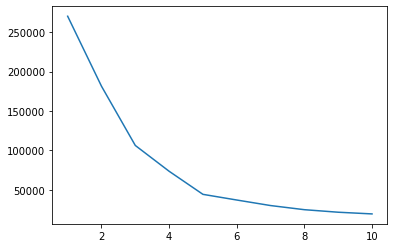

In [60]:
plt.plot(range(1,11),SSE_BI)

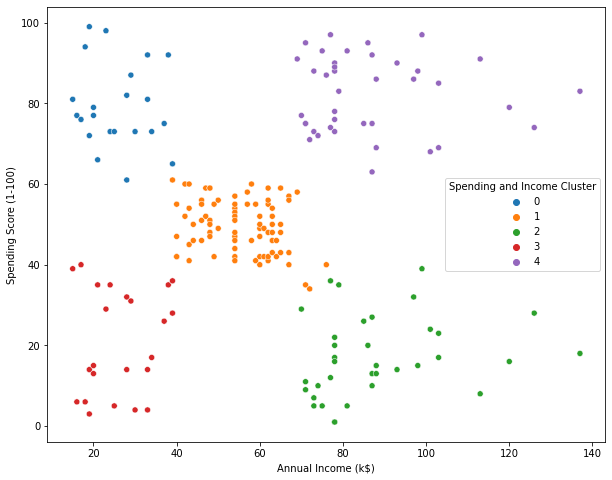

In [71]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="Annual Income (k$)",y='Spending Score (1-100)',hue="Spending and Income Cluster", palette='tab10');

In [73]:
#adding the centers as data frames

centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,25.727273,79.363636
1,55.296296,49.518519
2,88.200000,17.114286
3,26.304348,20.913043
4,86.538462,82.128205


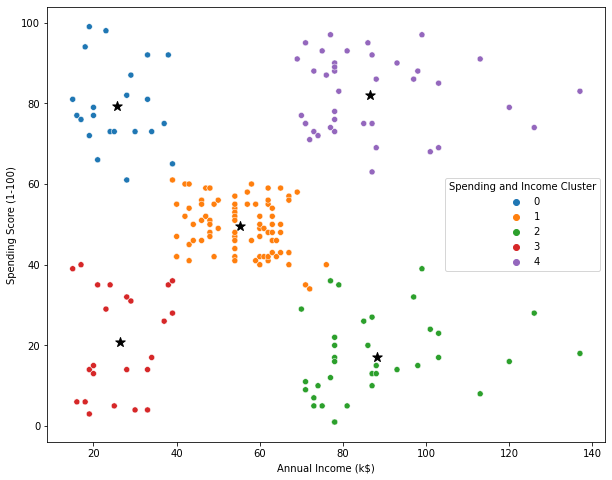

In [80]:
plt.figure(figsize=(10,8))

plt.scatter(x=centers["x"], y=centers["y"],s=100, c='black', marker='*')

sns.scatterplot(data=df, x="Annual Income (k$)",y='Spending Score (1-100)',hue="Spending and Income Cluster", palette='tab10');

In [81]:
#% of female and male in the bivariate cluster
pd.crosstab(df['Spending and Income Cluster'],df["Gender"],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.457143,0.542857
3,0.608696,0.391304
4,0.538462,0.461538


In [83]:
#age of the bivariate cluster

df.groupby(["Spending and Income Cluster"]) ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


#4th cluster can be targeted as it will bring in more money
#2nd cluster is also interesting as age is low but spending score is high
#campaigns can be ran for these customers
#53% of our cluster 4 are women, we can try and attract these using marketing campaigns

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,32.692308,86.538462,82.128205


In [84]:
df.to_csv("Clustering.csv")

In [ ]:
#Kmeans for dummies

# K is the free parameter, we can select K using differernt methods, consider K is 2 ie 2 clusters

# Now, select four random values from table which will be the two centroids. now from these centroids we calculate 
# the distance to other points using euclidean distance, small the distance put them in the same cluster

# ref https://www.youtube.com/watch?v=CLKW6uWJtTc
    
# now once the point is fixed into the cluster, consider the point went into cluster 2, then calculate the new centroid for 
# cluster 2 using the distance formula and that will be the cluster for that centroid, the centrid for the cluster 1 will
# not change in this step, it can change later on.

# keep doing this and you will have the two clusters needed.

#in KMeans in sklearn k=8 by default (ie 8 clusters), we use elbow method to find the no of K

# Elbow method = start with some k, lets say k=2, and find SSE1 and SSE2 (sum of squared errors) -- try to compute distance of 
# individual datapoints from the centroid sum it and square it out(just to remove the -ve values) 

# SSE= SSE1+SSE2 --- plot a SSE plot (y=SSE, x=K) --- at some point k==values and error will be zero so consider the elbow as
# a good k number. 

#kmeans.inertia_ returns the SSE value

